The output $y[n]$ is convolution of $x[n]$ and $h[n]$:

$$
\begin{align}
y[n] &= x[n] \ast h[n] \\ &= \sum_{l= -\infty}^{l= \infty} x[n]h[n-l]
\end{align}
$$

Assume that $h$ has $N$ in the length of vector and $x$ has $M$ in the length of vector. Now we can expand the definition of $x[n]$ and $h[n]$ during implementation.

$$
\begin{align}
x[n] &= 
\begin{cases}
x[n], & \text{if}\ 0 < n < M-1 \\
0, & \text{otherwise} \\
\end{cases} \\
h[n] &= 
\begin{cases}
 h[n], & \text{if}\ 0 < n < N-1 \\
0, & \text{otherwise} \\
\end{cases} \\
\end{align}
$$

* As long as $0 \le l \le M-1$, we have non-zero $x[l]$.
* As long as $0 \le n-l \le N-1$, we have non-zero $h[n-l]$.

Add up the sides of the two inequalities, we can get:

$$
0 \le n \le N+M-2
$$

which is the non-zero product of $y[n]$, and the $y$ has $N+M-2+1 = N+M-1$ terms.

In [1]:
from math import pi
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import IPython

In [2]:
h = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0])
x = np.array([1.0, 2.0, 3.0, 4.0])

N = len(h)
M = len(x)

y_linear = np.convolve(h, x)

h_ = np.append(h, np.zeros(16 - N))
x_ = np.append(x, np.zeros(16 - M))
y_circular = np.fft.ifft(np.fft.fft(h_) * np.fft.fft(x_)).real[:M+N-1]

print(y_circular)
print(y_linear)

[ 1.  4. 10. 20. 30. 40. 50. 60. 61. 52. 32.]
[ 1.  4. 10. 20. 30. 40. 50. 60. 61. 52. 32.]


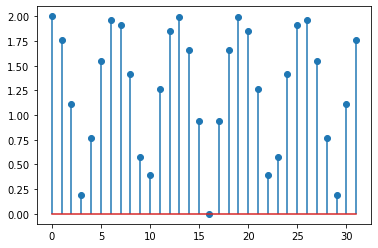

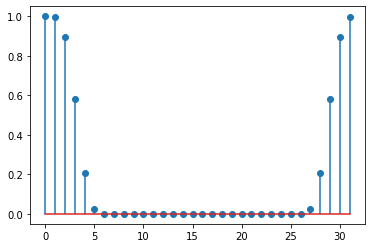

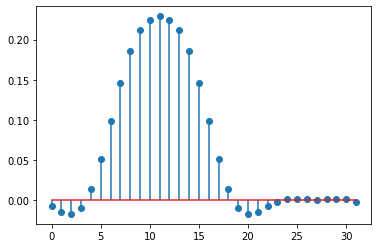

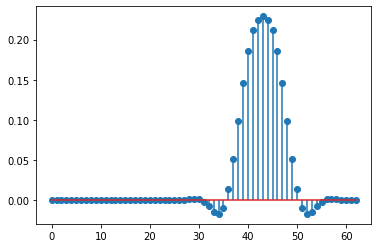

In [3]:
xn = np.zeros(32)
xn[25] = 1
xn[30] = 1

hn = signal.firwin(32, cutoff = 0.2, window="blackman")

Xn = np.fft.fft(xn)
Hn = np.fft.fft(hn)
Yn = Xn * Hn

plt.stem(np.abs(Xn))
plt.show()

plt.stem(np.abs(Hn))
plt.show()

plt.stem(np.fft.ifft(Yn).real)
plt.show()

plt.stem(np.convolve(xn,hn))
plt.show()